# 改进人马识别卷积神经网络(图片扩增)
主要参考于[DeepLearning.ai课程](https://github.com/lmoroney/dlaicourse)

在Course1中的Part5部分，我们已经实现了关于区分人马的卷积神经网络，在本节中，我们使用图片增强的方式来改进该CNN使其具有更好的性能。

## 1. 数据准备

In [4]:
import os
import zipfile

# 解压训练集
local_zip = 'tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('tmp/horse-or-human')

# 解压验证集
local_zip = 'tmp/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp/validation-horse-or-human')
zip_ref.close()

train_horse_dir = os.path.join('tmp/horse-or-human/horses')

train_human_dir = os.path.join('tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

print(train_horse_dir)

tmp/horse-or-human/horses


## 2. 构建模型

In [6]:
import tensorflow as tf

# 构建
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [8]:
# 编译模型
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=1e-4),
             metrics = ['accuracy'])

## 3. 数据预处理

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
validation_datagen = ImageDataGenerator(
rescale = 1./255.
)

train_generator = train_datagen.flow_from_directory(
    'tmp/horse-or-human/', 
    target_size =(300,300),
    batch_size = 128,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    'tmp/validation-horse-or-human/',
    target_size =(300,300),
    batch_size = 128,
    class_mode='binary'
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## 4. 训练模型

In [25]:
batch_size = 128
history = model.fit(
        train_generator,
        steps_per_epoch=int(1027/batch_size),
        epochs = 30,
        verbose = 2,
        validation_data = validation_generator,
        validation_steps=int(256/batch_size)
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 8 steps, validate for 2 steps
Epoch 1/30
8/8 - 85s - loss: 0.4000 - accuracy: 0.8131 - val_loss: 0.9537 - val_accuracy: 0.5781
Epoch 2/30
8/8 - 84s - loss: 0.3981 - accuracy: 0.7909 - val_loss: 1.3201 - val_accuracy: 0.5469
Epoch 3/30
8/8 - 85s - loss: 0.3612 - accuracy: 0.8343 - val_loss: 1.4526 - val_accuracy: 0.5508
Epoch 4/30
8/8 - 85s - loss: 0.4207 - accuracy: 0.7920 - val_loss: 1.4593 - val_accuracy: 0.5625
Epoch 5/30
8/8 - 85s - loss: 0.3165 - accuracy: 0.8554 - val_loss: 1.6441 - val_accuracy: 0.5547
Epoch 6/30
8/8 - 86s - loss: 0.3267 - accuracy: 0.8621 - val_loss: 1.7156 - val_accuracy: 0.5586
Epoch 7/30
8/8 - 85s - loss: 0.4054 - accuracy: 0.8142 - val_loss: 1.4940 - val_accuracy: 0.5742
Epoch 8/30
8/8 - 85s - loss: 0.3128 - accuracy: 0.8721 - val_loss: 1.8058 - val_accuracy: 0.5625
Epoch 9/30
8/8 - 84s - loss: 0.3235 - accuracy: 0.8343 - val_loss: 2.0837 - val_accuracy: 0.5352
Epoch 10/30
8/8 - 84s - loss: 0.3279 

## 5. 可视化精确度和损失


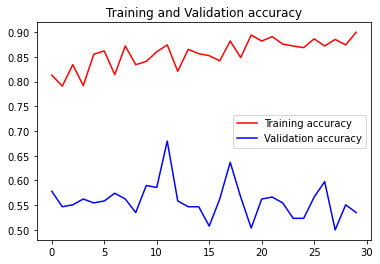

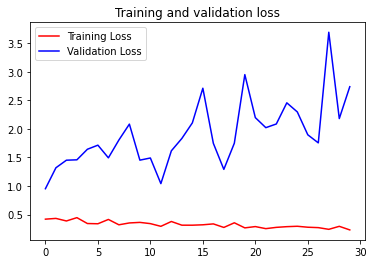

In [26]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'r',label='Training accuracy')
plt.plot(epochs,val_acc,'b',label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()